In [1]:
from google.colab import files
uploaded = files.upload()

Saving NVDA.csv to NVDA.csv


In [22]:
import pandas as pd
import numpy as np
import io
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
NDA = pd.read_csv('NVDA.csv')

In [4]:
NDA.head(5)

,Date,Adj Close,Close,High,Low,Open,Volume
0,1999-01-22,0.037615,0.041016,0.048828,0.038802,0.043750,2714688000
1,1999-01-25,0.041556,0.045313,0.045833,0.041016,0.044271,510480000
2,1999-01-26,0.038331,0.041797,0.046745,0.041146,0.045833,343200000
3,1999-01-27,0.038212,0.041667,0.042969,0.039583,0.041927,244368000
4,1999-01-28,0.038092,0.041536,0.041927,0.041276,0.041667,227520000


In [5]:
NDA.tail(5)

,Date,Adj Close,Close,High,Low,Open,Volume
6553,2025-02-10,133.570007,133.570007,135.000000,129.960007,130.089996,216989100
6554,2025-02-11,132.800003,132.800003,134.479996,131.020004,132.580002,178902400
6555,2025-02-12,131.139999,131.139999,132.240005,129.080002,130.020004,160278600
6556,2025-02-13,135.289993,135.289993,136.500000,131.169998,131.559998,197430000
6557,2025-02-14,138.850006,138.850006,139.250000,135.500000,136.479996,194892300


In [6]:
NDA.isnull().sum()

,0
Date,0
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [7]:
NDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6558 entries, 0 to 6557
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6558 non-null   object 
 1   Adj Close  6558 non-null   float64
 2   Close      6558 non-null   float64
 3   High       6558 non-null   float64
 4   Low        6558 non-null   float64
 5   Open       6558 non-null   float64
 6   Volume     6558 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 358.8+ KB


In [8]:
NDA.describe()

,Adj Close,Close,High,Low,Open,Volume
count,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6.558000e+03
mean,8.768532,8.795447,8.956567,8.618315,8.795850,5.991103e+08
std,23.907205,23.904882,24.349618,23.419200,23.922708,4.307236e+08
min,0.031286,0.034115,0.035547,0.033333,0.034896,1.968000e+07
25%,0.257739,0.281042,0.288511,0.273354,0.280810,3.384780e+08
50%,0.437176,0.466083,0.472875,0.459250,0.466584,5.002635e+08
75%,4.597059,4.644625,4.724000,4.588750,4.632437,7.307002e+08
max,149.429993,149.429993,153.130005,147.820007,153.029999,9.230856e+09


In [9]:
NDA.value_counts()

,,,,,,,count
Date,Adj Close,Close,High,Low,Open,Volume,
1999-01-22,0.037615,0.041016,0.048828,0.038802,0.043750,2714688000,1
2016-06-02,1.157369,1.178500,1.188500,1.165000,1.176500,329208000,1
2016-06-16,1.167435,1.188750,1.190750,1.163750,1.175250,246456000,1
2016-06-15,1.162770,1.184000,1.194250,1.168750,1.181750,301036000,1
2016-06-14,1.150985,1.172000,1.177500,1.154000,1.167000,298344000,1
...,...,...,...,...,...,...,...
2007-09-27,0.843260,0.919500,0.930000,0.909750,0.925500,378280000,1
2007-09-26,0.840738,0.916750,0.918750,0.897750,0.900000,518032000,1
2007-09-25,0.821250,0.895500,0.899250,0.876500,0.879000,360748000,1


In [11]:
NDA['Date']

,Date
0,1999-01-22
1,1999-01-25
2,1999-01-26
3,1999-01-27
4,1999-01-28
...,...
6553,2025-02-10
6554,2025-02-11
6555,2025-02-12
6556,2025-02-13


In [12]:
NDA['Date'] = pd.to_datetime(NDA['Date'])

In [13]:
NDA['Hour'] = NDA['Date'].dt.hour
NDA['Minute'] = NDA['Date'].dt.minute
NDA['second'] =NDA['Date'].dt.second

In [14]:
NDA['UTC_Offset'] = NDA['Date'].dt.tz_localize(None).dt.tz_localize(tz='UTC')

In [15]:
# Seperating Day, Mounth, Year
NDA['Day'] = NDA['Date'].dt.day
NDA['Month'] = NDA['Date'].dt.month
NDA['Year'] = NDA['Date'].dt.year

In [16]:
NDA.head(5)

,Date,Adj Close,Close,High,Low,Open,Volume,Hour,Minute,second,UTC_Offset,Day,Month,Year
0,1999-01-22,0.037615,0.041016,0.048828,0.038802,0.043750,2714688000,0,0,0,1999-01-22 00:00:00+00:00,22,1,1999
1,1999-01-25,0.041556,0.045313,0.045833,0.041016,0.044271,510480000,0,0,0,1999-01-25 00:00:00+00:00,25,1,1999
2,1999-01-26,0.038331,0.041797,0.046745,0.041146,0.045833,343200000,0,0,0,1999-01-26 00:00:00+00:00,26,1,1999
3,1999-01-27,0.038212,0.041667,0.042969,0.039583,0.041927,244368000,0,0,0,1999-01-27 00:00:00+00:00,27,1,1999
4,1999-01-28,0.038092,0.041536,0.041927,0.041276,0.041667,227520000,0,0,0,1999-01-28 00:00:00+00:00,28,1,1999


-EDA-

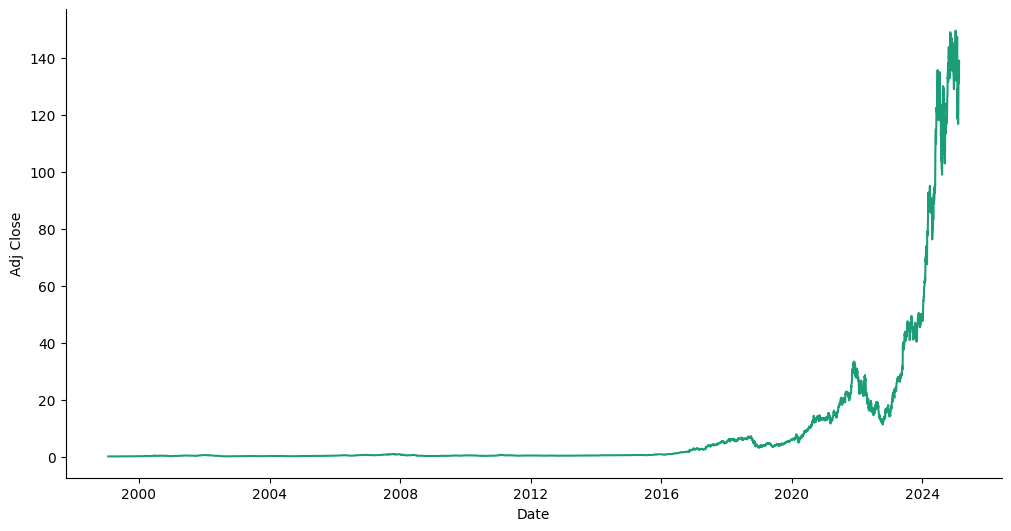

In [21]:
# Date vs Adj Close
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Adj Close']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = NDA.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Adj Close')

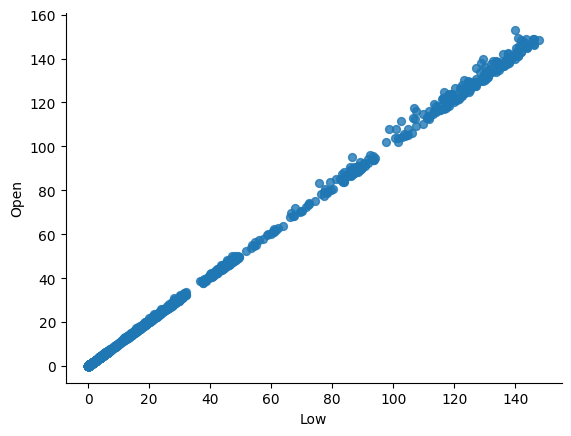

In [18]:
# Low vs Open
NDA.plot(kind='scatter', x='Low', y='Open', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

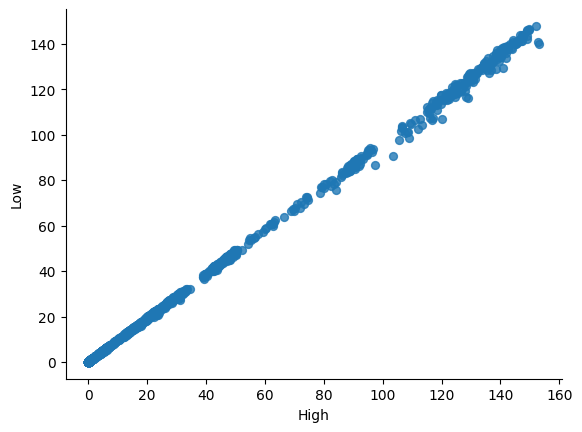

In [23]:
# High vs Low
NDA.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [29]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=NDA['Volume'],
    nbinsx=30,
    name='Volume',
    marker=dict(color='rgba(255, 0, 0, 0.7)'),
    opacity=0.7
))

fig.update_layout(
    title="Volume Distribution",
    plot_bgcolor='White',
    paper_bgcolor='White',
    font=dict(color='Black'),
    xaxis=dict(title='Volume', color='Black'),
    yaxis=dict(title='Frequency', color='Black')
)

fig.show()


In [32]:
NDA['50D_MA'] = NDA['Close'].rolling(window=50).mean()
NDA['200D_MA'] = NDA['Close'].rolling(window=200).mean()


fig = go.Figure()

fig.add_trace(go.Scatter(
    x=NDA['Date'], y=NDA['Close'], mode='lines', name='Close Price', line=dict(color='cyan')
))

fig.add_trace(go.Scatter(
    x=NDA['Date'], y=NDA['50D_MA'], mode='lines', name='50-Day MA', line=dict(color='orange')
))

fig.add_trace(go.Scatter(
    x=NDA['Date'], y=NDA['200D_MA'], mode='lines', name='200-Day MA', line=dict(color='magenta')
))

fig.update_layout(
    title="Close Price with 50 and 200-Day Moving Averages",
    plot_bgcolor='Grey',
    paper_bgcolor='Grey',
    font=dict(color='white'),
    xaxis=dict(title='Date', color='white'),
    yaxis=dict(title='Price', color='white')
)

fig.show()


In [33]:
NDA['Daily_Return'] = NDA['Close'].pct_change() * 100
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=NDA['Daily_Return'].dropna(),
    name='Daily Return',
    marker=dict(color='rgba(0, 255, 0, 0.7)'),
    opacity=0.7
))

fig.update_layout(
    title="Daily Return Distribution",
    plot_bgcolor='Grey',
    paper_bgcolor='Grey',
    font=dict(color='white'),
    xaxis=dict(title='Daily Return (%)', color='white'),
    yaxis=dict(title='Frequency', color='white')
)

fig.show()


In [34]:
correlation_matrix = NDA[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

fig = px.imshow(correlation_matrix,
                color_continuous_scale='RdBu',
                title="Correlation Between Columns",
                labels={'color': 'Correlation'},
                color_continuous_midpoint=0)

fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    title_font=dict(color='white'),
    xaxis=dict(color='white'),
    yaxis=dict(color='white')
)

fig.show()


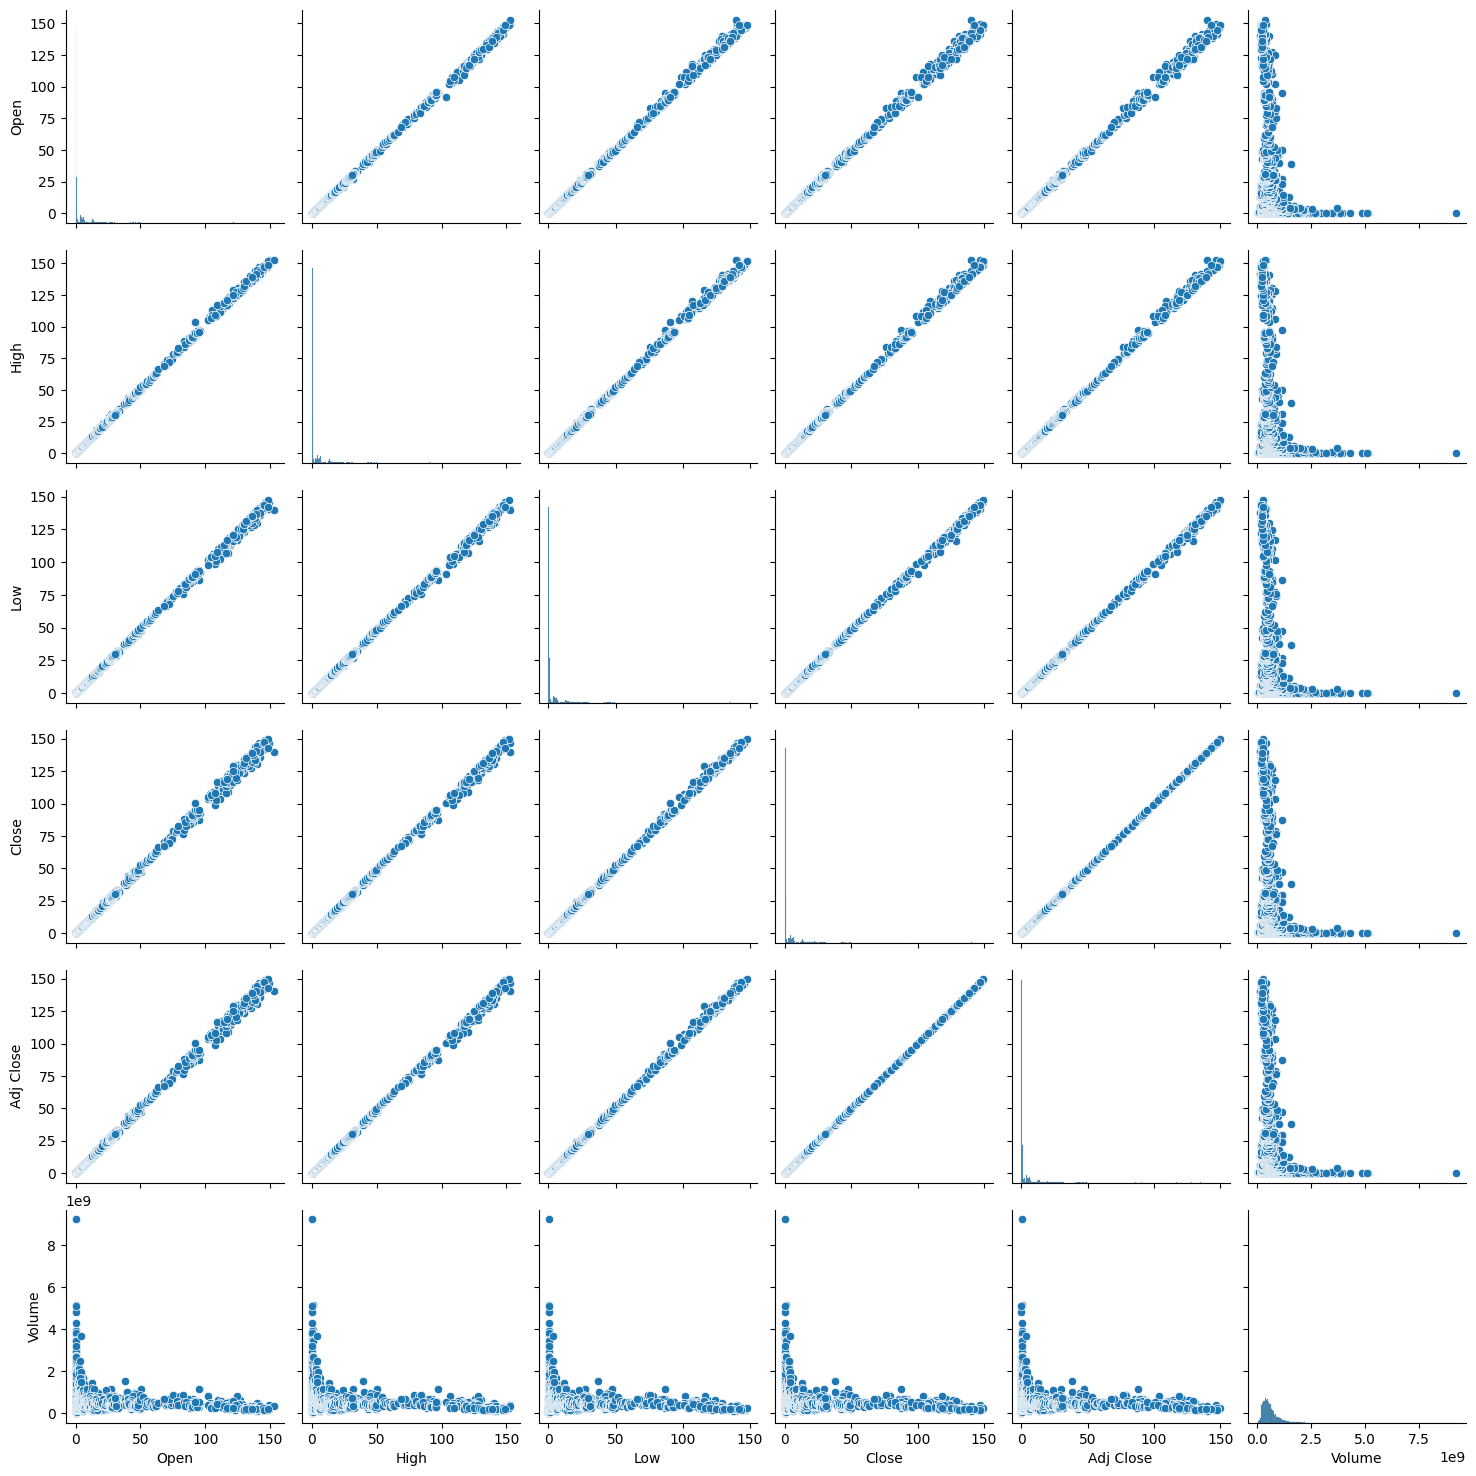

In [36]:
sns.pairplot(NDA[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])
plt.show()


In [42]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Box(y=NDA['Volume'], name='Volume', boxpoints='all', jitter=0.3, pointpos=-1.8)])

fig.update_layout(
    title="Box Plot of Volume",
    plot_bgcolor='White',
    paper_bgcolor='White',
    font=dict(color='Black'),
    xaxis=dict(title='Volume', color='Black'),
    yaxis=dict(title='Frequency', color='Black')
)

fig.show()


In [44]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=NDA['Date'], y=NDA['Open'], mode='lines', name='Open'))
fig.add_trace(go.Scatter(x=NDA['Date'], y=NDA['High'], mode='lines', name='High'))
fig.add_trace(go.Scatter(x=NDA['Date'], y=NDA['Low'], mode='lines', name='Low'))
fig.add_trace(go.Scatter(x=NDA['Date'], y=NDA['Close'], mode='lines', name='Close'))
fig.add_trace(go.Scatter(x=NDA['Date'], y=NDA['Adj Close'], mode='lines', name='Adjusted Close'))

fig.update_layout(
    title='Comparison of Open, High, Low, Close, and Adjusted Close Prices Over Time',
    xaxis_title='Date',
    yaxis_title='Price',
    legend_title='Price Type',
    plot_bgcolor='White',
    paper_bgcolor='White',
    font=dict(color='Black')
)
fig.show()


Preprocess


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report

In [48]:
# Split into Train and Test sets (80% train, 20% test)

X = NDA.drop('Adj Close', axis=1)  # Features (all columns except 'Adj Close')
y = NDA['Adj Close']  # Target variable ('Adj Close')

# Convert date to ordinal values for model compatibility
X['Date'] = X['Date'].apply(lambda date: date.toordinal())
X['UTC_Offset'] = X['UTC_Offset'].apply(lambda date: date.toordinal())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

# Now you have X_train, X_test, y_train, and y_test for your model
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(5246, 16) (1312, 16)
(5246,) (1312,)


Models


In [54]:
# Initialize models
models = {
    "linear_regression": LinearRegression(),
    "decision_tree":DecisionTreeRegressor(),
    "random_forest" :RandomForestRegressor(),
    "svm" : SVR(),
   "Gradient Boosting": GradientBoostingClassifier()
}

In [58]:
# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    try:
        model.fit(X_train, y_train)  # Train the model
        y_pred = model.predict(X_test)  # Make predictions on the test set

        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f"{name} - Mean Squared Error: {mse}")
        print(f"{name} - R-squared: {r2}")
    except Exception as e:
        print(f"Error training {name}: {e}")


Training linear_regression...
Error training linear_regression: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
Training decision_tree...
decision_tree - Mean Squared Error: 0.06059434603987936
decision_tree - R-squared: 0.9998767526406148
Training random_forest...
random_forest - Mean Squared Error: 0.03251969108584192
random_forest - R-squared: 0.9999338557750633
Training svm...
Error training svm: Input

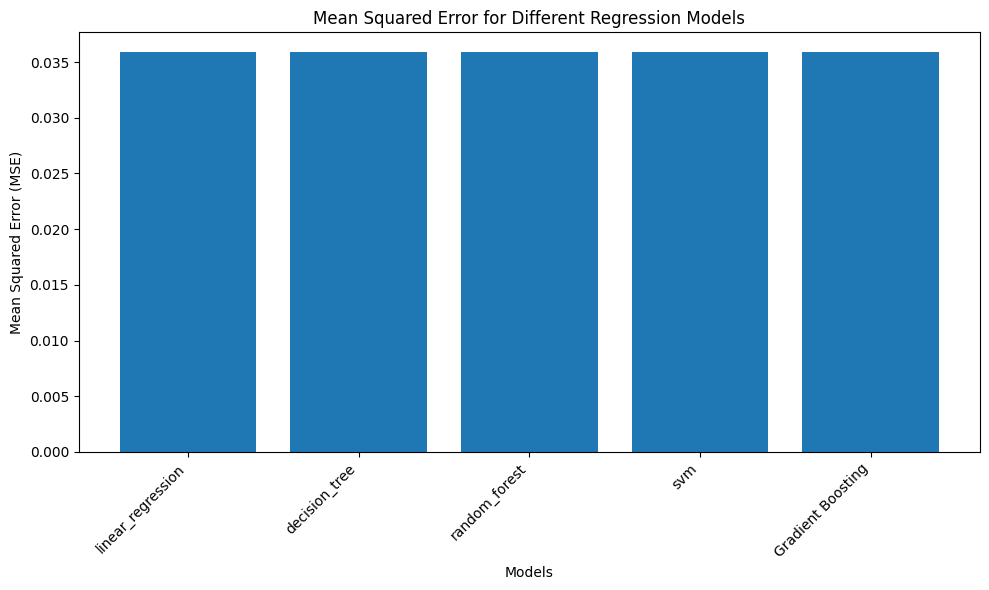

In [62]:
mse_values = {}
for name, model in models.items():
    try:

        mse = mean_squared_error(y_test, y_pred)
        mse_values[name] = mse
    except Exception as e:
        print(f"Error training {name}: {e}")
        mse_values[name] = float('nan') # Or handle the error as appropriate


# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(mse_values.keys(), mse_values.values())
plt.xlabel("Models")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Mean Squared Error for Different Regression Models")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [66]:
# RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
    # Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    try:
        model.fit(X_train, y_train)  # Train the model
        y_pred = model.predict(X_test)  # Make predictions on the test set

        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        rmse_val = rmse(y_test, y_pred) # Calculate RMSE
        r2 = r2_score(y_test, y_pred)

        print(f"{name} - Mean Squared Error: {mse}")
        print(f"{name} - RMSE: {rmse_val}") # Print RMSE
        print(f"{name} - R-squared: {r2}")
    except Exception as e:
        print(f"Error training {name}: {e}")


Training linear_regression...
Error training linear_regression: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
Training decision_tree...
decision_tree - Mean Squared Error: 0.03218950818455198
decision_tree - RMSE: 0.1794143477667045
decision_tree - R-squared: 0.9999345273586905
Training random_forest...
random_forest - Mean Squared Error: 0.03046107353840053
random_forest - RMSE: 0.17453101024861034
rand

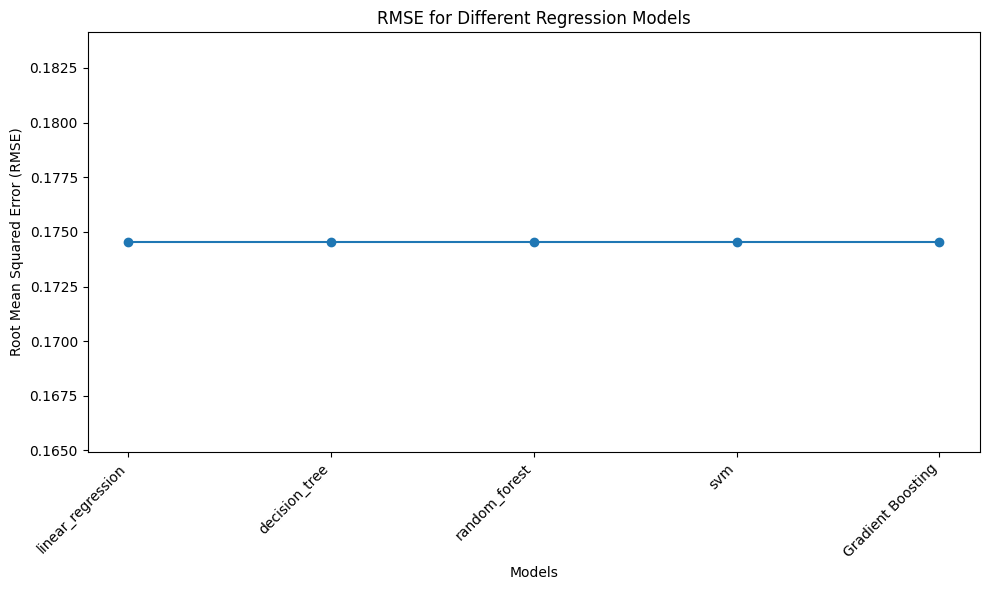

In [69]:
rmse_values = {}
for name, model in models.items():
    try:
        rmse_values[name] = rmse_val
    except Exception as e:
        print(f"Error calculating RMSE for {name}: {e}")
        rmse_values[name] = float('nan')

# Create the RMSE line plot
plt.figure(figsize=(10, 6))
plt.plot(rmse_values.keys(), rmse_values.values(), marker='o', linestyle='-')  # Line plot
plt.xlabel("Models")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("RMSE for Different Regression Models")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Time Series Forecasting

Predicted Price on 2025-02-19: 119.05367430799984
Predicted Price on 2025-02-20: 124.79934201500018
Predicted Price on 2025-02-21: 128.6285656869999
Predicted Price on 2025-02-22: 130.05409003800006
Predicted Price on 2025-02-23: 133.3714204330001
Predicted Price on 2025-02-24: 132.66794497599992
Predicted Price on 2025-02-25: 131.10270356000012
Predicted Price on 2025-02-26: 135.4067408860002
Predicted Price on 2025-02-27: 138.77665543099994


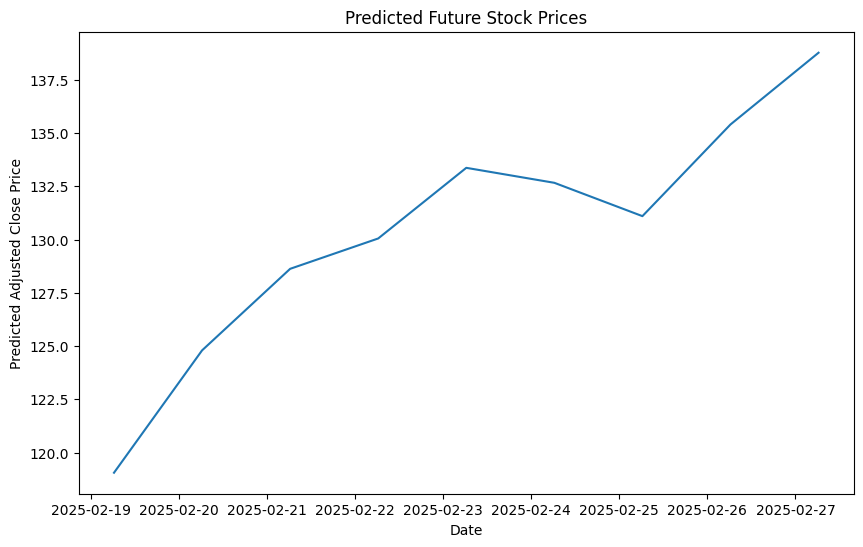

In [73]:
def predict_future_prices(model, future_dates, X_train):

    future_X = X_train.tail(len(future_dates)).copy()
    future_X['Date'] = [date.toordinal() for date in future_dates]

    # Make predictions
    future_prices = model.predict(future_X)
    return future_prices

from datetime import datetime, timedelta

# Example of future dates (replace with your desired future dates)
future_dates = [datetime.today() + timedelta(days=i) for i in range(1, 10)]

# Predicting with the RandomForestRegressor model
best_model = models['random_forest']
predicted_prices = predict_future_prices(best_model, future_dates, X)

# Print or visualize the predictions:
for i in range(len(future_dates)):
    print(f"Predicted Price on {future_dates[i].date()}: {predicted_prices[i]}")


# Example visualization of predictions
plt.figure(figsize=(10, 6))
plt.plot(future_dates, predicted_prices)
plt.xlabel("Date")
plt.ylabel("Predicted Adjusted Close Price")
plt.title("Predicted Future Stock Prices")
plt.show()
